NAME : ZAHID HASAN TALUKDER (ANIK)

ID : 20-42284-1

SEC : C

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = '/content/drive/MyDrive/archive (1)'

In [ ]:
import os
CATEGORIES = []

for i in os.listdir(dataset):
    CATEGORIES.append(i)

print(CATEGORIES)

['with_mask', 'without_mask']


In [ ]:
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(dataset, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        TRAIN_DATA.append([img_arr, class_num])

print(len(TRAIN_DATA))

100%|██████████| 1918/1918 [00:07<00:00, 272.50it/s]

3833


In [ ]:
random.shuffle(TRAIN_DATA)

In [ ]:
import numpy as np
import cv2

X = []
y = []

for features, label in TRAIN_DATA:
    resized_img = cv2.resize(features, (128, 128))  # Resize each image to (128, 128)
    X.append(resized_img)
    y.append(label)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3833, 128, 128, 3)
y shape: (3833,)


In [ ]:
from keras.utils import to_categorical


y_encoded = to_categorical(y, num_classes=3)

In [ ]:
x_train = X.astype("float32") / 255.0


In [ ]:
import tensorflow as tf
x_train_resized = tf.image.resize(x_train, (224, 224))

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

num_classes = 3

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
h = model.fit(x_train_resized, y_encoded, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 33s 693ms/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.2075 - val_accuracy: 0.9426
Epoch 2/10
48/48 [==============================] - 32s 668ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.0719 - val_accuracy: 0.9857
Epoch 3/10
48/48 [==============================] - 32s 664ms/step - loss: 3.3611e-04 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 0.9935
Epoch 4/10
48/48 [==============================] - 32s 675ms/step - loss: 9.0640e-05 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9948
Epoch 5/10
48/48 [==============================] - 32s 664ms/step - loss: 1.0969e-04 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9974
Epoch 6/10
48/48 [==============================] - 32s 670ms/step - loss: 2.4879e-05 - accuracy: 1.0000 - val_loss: 0.0184 - val_accuracy: 0.9961
Epoch 7/10
48/48 [==============================] - 32s 672ms/step - loss: 2.3096e-05 - accuracy: 1.0000 - val_loss: 0.0176 - 

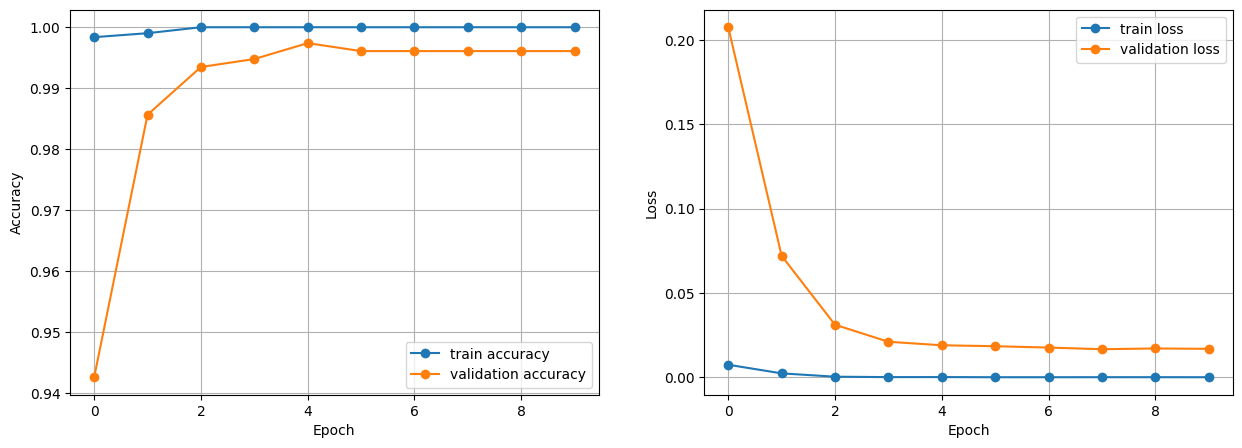

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/final_CVPR')

#model.save("final_model", save_format="h5")

In [ ]:
import os
import cv2
import urllib.request


haarcascade_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'


model_directory = '/content/drive/MyDrive/final_CVPR'


xml_filename = 'haarcascade_frontalface_default.xml'
xml_file_path = os.path.join(model_directory, xml_filename)


urllib.request.urlretrieve(haarcascade_url, xml_file_path)


face_cascade = cv2.CascadeClassifier(xml_file_path)

# Now you can use the face_cascade for face detection

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
model_path = '/content/drive/MyDrive/final_CVPR'
loaded_model = load_model(model_path)
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [ ]:
mask_detection = '/content/drive/MyDrive/final_CVPR'

text_mask = "Mask On"
text_no_mask = "Mask Off"
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.8
def predict(image):

    face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_frame = cv2.resize(face_frame, (224, 224))
    face_frame = img_to_array(face_frame)
    face_frame = np.expand_dims(face_frame, axis=0)
    face_frame =  preprocess_input(face_frame)

    prediction = mask_detection.predict(face_frame)

    return prediction[0][0]

In [ ]:
def detector(gray_image, frame):

    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)

    for (x,y,w,h) in faces:

        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)


        if mask > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
            thickness = 2)

        elif mask <= 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(frame, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
            thickness = 2)

    return frame

In [ ]:
import cv2

video_cap = cv2.VideoCapture(0)
ret, frame = video_cap.read()
cv2.imshow("Camera Test", frame)
cv2.waitKey(0)
video_cap.release()
cv2.destroyAllWindows()
# I have tried running a minimal code snippet to capture a single frame from the camera and display it.
# This will help determine if the camera is accessible and working.
#but it did not work! i have tried multiple times

DisabledFunctionError: ignored

In [ ]:
video_cap = cv2.VideoCapture(0)

while True:

    ret, frame = video_cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    detect = detector(gray_frame, frame)

    cv2.imshow("Video", detect)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_cap.release()
cv2.destroyAllWindows()

error: ignored